In [1]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from torch import nn

device = "cpu"

2025-04-16 22:08:10.654929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744855690.668994   67213 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744855690.672403   67213 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-16 22:08:10.685649: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Could not load bitsandbytes native library: 'NoneType' object has no attribute 'split'
Traceback (most recent call last):
  F

In [2]:
pipe_type = torch.float16 if device == "cuda" else torch.float32
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=pipe_type)
pipe = pipe.to(device)
pipe.enable_attention_slicing() 
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
prompt = "a futuristic cityscape"
text_input = pipe.tokenizer(prompt, padding="max_length", max_length=pipe.tokenizer.model_max_length, return_tensors="pt")

In [4]:
text_input

{'input_ids': tensor([[49406,   320, 30987, 40808, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]])}

In [5]:
pipe.tokenizer.convert_ids_to_tokens(text_input.input_ids[0])

['<|startoftext|>',
 'a</w>',
 'futuristic</w>',
 'cityscape</w>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>',
 '<|endoftext|>

In [6]:
text_input.input_ids[0, 0]

tensor(49406)

In [7]:
pipe.tokenizer.decode(text_input.input_ids[0], skip_special_tokens=True)

'a futuristic cityscape'

In [8]:
pipe.tokenizer.decode(torch.tensor([text_input.input_ids[0, 1]]))

'a'

In [9]:
with torch.no_grad():
    text_embeddings = pipe.text_encoder(text_input.input_ids.to(device))[0]

In [10]:
text_embeddings.requires_grad_(True)

tensor([[[-0.3884,  0.0229, -0.0522,  ..., -0.4899, -0.3066,  0.0675],
         [ 0.0290, -1.3258,  0.3085,  ..., -0.5257,  0.9768,  0.6652],
         [ 0.1643,  0.0385,  0.7491,  ..., -1.2051, -0.5538,  0.5510],
         ...,
         [ 1.0145,  1.4835, -0.6628,  ...,  1.0167, -0.8124, -0.3304],
         [ 1.0173,  1.4762, -0.6511,  ...,  1.0101, -0.8085, -0.3428],
         [ 1.0339,  1.4352, -0.6193,  ...,  0.9290, -0.7245, -0.3472]]],
       requires_grad=True)

In [11]:
with torch.no_grad():
    latents = torch.randn((1, pipe.unet.in_channels, 64, 64), device=device)  # typical latent size
    latents = latents.to(pipe_type) * pipe.scheduler.init_noise_sigma  # match scheduler expectations

/tmp/ipykernel_67213/754967804.py:2: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  latents = torch.randn((1, pipe.unet.in_channels, 64, 64), device=device)  # typical latent size


In [12]:
latents.dtype

torch.float32

In [13]:
text_embeddings.dtype

torch.float32

In [14]:
from torch.amp import autocast

with autocast(enabled=True, device_type=device):
    noise_pred = pipe.unet(latents, torch.tensor([1], device=device), encoder_hidden_states=text_embeddings).sample

In [15]:
latents

tensor([[[[ 7.1795e-02, -1.8777e+00,  1.4760e+00,  ...,  1.5920e+00,
            1.6949e+00, -1.1960e+00],
          [-1.2509e+00,  2.0197e-01, -1.5912e+00,  ...,  1.9098e-01,
            1.8624e+00, -8.4567e-01],
          [-3.0943e-02, -8.6657e-01, -3.0319e-01,  ..., -1.0809e+00,
            7.9757e-01,  2.1054e-01],
          ...,
          [-5.1643e-01, -4.8337e-01,  1.0039e-01,  ..., -3.7661e-02,
           -1.3211e-01,  1.1291e+00],
          [-1.0642e+00, -1.8228e+00, -1.1798e+00,  ..., -1.0029e+00,
            6.0116e-01,  1.4123e+00],
          [ 1.2654e-01,  4.0914e-01,  1.9534e+00,  ...,  1.3294e+00,
           -4.7598e-02, -1.7091e-01]],

         [[ 3.9549e-02,  1.7690e+00,  1.7959e+00,  ...,  6.8599e-01,
           -1.3469e+00,  3.8565e-01],
          [ 1.1522e+00,  3.6296e-01,  7.4646e-01,  ..., -9.4630e-01,
           -1.3303e+00,  9.5172e-01],
          [ 4.9067e-01,  2.4589e+00, -6.9079e-01,  ...,  8.5467e-01,
           -8.0011e-01,  1.1217e-01],
          ...,
     

In [16]:
help(pipe.scheduler.step)

Help on method step in module diffusers.schedulers.scheduling_ddim:

step(model_output: torch.Tensor, timestep: int, sample: torch.Tensor, eta: float = 0.0, use_clipped_model_output: bool = False, generator=None, variance_noise: Optional[torch.Tensor] = None, return_dict: bool = True) -> Union[diffusers.schedulers.scheduling_ddim.DDIMSchedulerOutput, Tuple] method of diffusers.schedulers.scheduling_ddim.DDIMScheduler instance
    Predict the sample from the previous timestep by reversing the SDE. This function propagates the diffusion
    process from the learned model outputs (most often the predicted noise).
    
    Args:
        model_output (`torch.Tensor`):
            The direct output from learned diffusion model.
        timestep (`float`):
            The current discrete timestep in the diffusion chain.
        sample (`torch.Tensor`):
            A current instance of a sample created by the diffusion process.
        eta (`float`):
            The weight of noise for added

In [ ]:
pipe.scheduler.set_timesteps(20)
latents = pipe.scheduler.step(model_output=noise_pred, timestep=1, sample=latents)

In [24]:
image = latents.pred_original_sample

[[[0.49865663 0.495334   0.48828444 0.49941847]
  [0.23899566 0.7246292  0.4115604  0.4361828 ]
  [0.6854158  0.72744715 0.4094389  0.38765204]
  ...
  [0.69891256 0.5790437  0.3973442  0.18178038]
  [0.7149641  0.30981806 0.5769416  0.44276378]
  [0.3324531  0.5394963  0.5620244  0.566162  ]]

 [[0.32271641 0.64262414 0.50027865 0.54459304]
  [0.5150524  0.53845847 0.5723222  0.3871665 ]
  [0.27817908 0.58943695 0.49359158 0.47868207]
  ...
  [0.51616526 0.36350745 0.55158466 0.59838134]
  [0.7364851  0.3122973  0.600398   0.34237263]
  [0.37668318 0.614751   0.49941707 0.42015052]]

 [[0.48495248 0.5543281  0.63813215 0.5061474 ]
  [0.3736184  0.81725293 0.675437   0.47217053]
  [0.44790348 0.3975589  0.57169664 0.569302  ]
  ...
  [0.34463653 0.60287046 0.42033455 0.42810118]
  [0.5943089  0.38355312 0.5245468  0.31655806]
  [0.5177835  0.503636   0.6037802  0.6541713 ]]

 ...

 [[0.4203467  0.5206932  0.47753093 0.5304383 ]
  [0.42426655 0.6173462  0.40211576 0.47205648]
  [0.50312

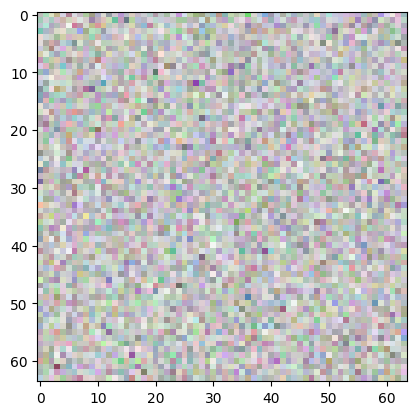

In [ ]:
img_np = image.detach().cpu().squeeze().permute(1, 2, 0).numpy() # Squeeze if you want to remove the channel dimension
img_np = (img_np - img_np.min()) / (img_np.max() - img_np.min())
import matplotlib.pyplot as plt
# Plot using matplotlib
plt.imshow(img_np, cmap='gray')
plt.show()

In [33]:
m = image.mean()

In [35]:
m.backward()

In [45]:
text_embeddings.grad.shape

torch.Size([1, 77, 768])

In [47]:
text_input.input_ids

tensor([[49406,   320, 30987, 40808, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407]])

In [49]:
pipe.tokenizer.vocab_size

49408

In [50]:
specials = {
    "bos_token": pipe.tokenizer.bos_token,
    "eos_token": pipe.tokenizer.eos_token,
    "pad_token": pipe.tokenizer.pad_token,
    "unk_token": pipe.tokenizer.unk_token,
    "additional_special_tokens": pipe.tokenizer.additional_special_tokens,
}

for name, token in specials.items():
    print(f"{name}: {token}")


bos_token: <|startoftext|>
eos_token: <|endoftext|>
pad_token: <|endoftext|>
unk_token: <|endoftext|>
additional_special_tokens: []


In [51]:
special_token_ids = set()

# Add basic special tokens
for attr in ["bos_token", "eos_token", "pad_token", "unk_token"]:
    token = getattr(pipe.tokenizer, attr, None)
    if token is not None:
        token_id = pipe.tokenizer.convert_tokens_to_ids(token)
        special_token_ids.add(token_id)

# Add additional special tokens (if any)
for token in pipe.tokenizer.additional_special_tokens:
    token_id = pipe.tokenizer.convert_tokens_to_ids(token)
    special_token_ids.add(token_id)

print("Special token IDs:", special_token_ids)

Special token IDs: {49406, 49407}


In [57]:
special_ids_tensor = torch.tensor(list(special_token_ids), device=device)

In [58]:
mask = ~torch.isin(text_input.input_ids[0], special_ids_tensor)

In [61]:
text_embeddings[0, mask]

tensor([[ 0.0290, -1.3258,  0.3085,  ..., -0.5257,  0.9768,  0.6652],
        [ 0.1643,  0.0385,  0.7491,  ..., -1.2051, -0.5538,  0.5510],
        [ 1.4376,  1.7590,  1.1330,  ...,  0.1609, -1.1063,  1.7154]],
       grad_fn=<IndexBackward0>)

In [79]:
importance = (text_embeddings.grad[0, mask] * text_embeddings[0, mask]).sum(dim=-1)

In [82]:
final_importance = importance / importance.norm()

In [83]:
final_importance

tensor([0.3973, 0.5576, 0.7289], grad_fn=<DivBackward0>)

In [87]:
token_ids = text_input.input_ids[0, mask]

In [88]:
for i, token_id in enumerate(token_ids):
    imp = final_importance[i]
    word = pipe.tokenizer.decode(token_id)
    print(f"Token: {word}, importance: {imp}")

Token: a, importance: 0.3972623646259308
Token: futuristic, importance: 0.5576004981994629
Token: cityscape, importance: 0.7288788557052612
